Initializing libraries

In [1]:
import numpy as np
import cv2
import PIL
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import files
uploaded= files.upload()
for fn in uploaded.keys():
  print(f"User uploaded file {fn} with length {len(uploaded[fn])}")
!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

In [ ]:
!unzip flowers-recognition.zip -d flowers

In [6]:
data_dir = "/content/flowers/flowers"

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

In [8]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

4317

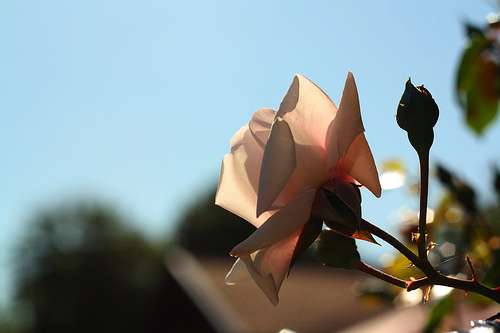

In [9]:
roses = list(data_dir.glob("rose/*.jpg"))
PIL.Image.open(str(roses[10]))

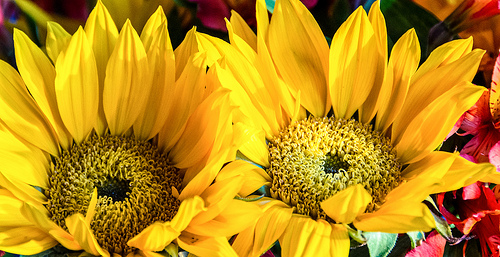

In [10]:
sunflowers = list(data_dir.glob("sunflower/*.jpg"))
PIL.Image.open(str(sunflowers[10]))

In [11]:
flowers_images ={
    "roses" : list(data_dir.glob("rose/*.jpg")),
    "sunflowers" : list(data_dir.glob("sunflower/*.jpg")),
    "daisy" : list(data_dir.glob("daisy/*.jpg")),
    "dandelion" : list(data_dir.glob("dandelion/*.jpg")),
    "tulips" : list(data_dir.glob("tulip/*.jpg"))
}
flowers_labels ={
    "roses" :0,
    "sunflowers" : 1,
    "daisy" : 2,
    "dandelion" : 3,
    "tulips" : 4
}

In [12]:
x,y = [] , []
for flower_name , images in flowers_images.items() :
  for image in images :
    img=cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_labels[flower_name])

In [13]:
x=np.array(x)
y= np.array(y)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state =0)
x_train= x_train/255
x_test= x_test /255

In [15]:
cnn=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,3,padding= "same",activation= tf.nn.relu,input_shape=(180,180,3)),
                                  tf.keras.layers.MaxPooling2D(),
                                tf.keras.layers.Conv2D(32,3,padding= "same",activation= tf.nn.relu),
                                  tf.keras.layers.MaxPooling2D(),
                                tf.keras.layers.Conv2D(64,3,padding= "same",activation= tf.nn.relu),
                                  tf.keras.layers.MaxPooling2D(),

                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation= tf.nn.relu),
                                  tf.keras.layers.Dense(5,activation = tf.nn.softmax)])
cnn.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])
cnn.fit(x_train,y_train,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.3637 - loss: 1.4130
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.5981 - loss: 0.9837
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6878 - loss: 0.7972
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.7712 - loss: 0.5954
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.8612 - loss: 0.3938
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9263 - loss: 0.2332
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9554 - loss: 0.1495
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9715 - loss: 0.1048
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9862 - loss: 0.0497
Epoch 10/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9961 - loss: 0.0250


In [21]:
cnn.evaluate(x_test,y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 328ms/step - accuracy: 0.6670 - loss: 2.0195


[2.0800673961639404, 0.6490740776062012]

In [18]:
data_augmentation = Sequential(
                              [
                               layers.RandomRotation(0.1),
                               layers.RandomZoom(0.1)
                               ]
                               )

In [ ]:
cnn_augmented=tf.keras.models.Sequential([data_augmentation,
                                tf.keras.layers.Conv2D(16,3,padding= "same",activation= tf.nn.relu,input_shape=(180,180,3)),
                                  tf.keras.layers.MaxPooling2D(),
                                tf.keras.layers.Conv2D(32,3,padding= "same",activation= tf.nn.relu),
                                  tf.keras.layers.MaxPooling2D(),
                                tf.keras.layers.Conv2D(64,3,padding= "same",activation= tf.nn.relu),
                                  tf.keras.layers.MaxPooling2D(),
                                layers.Dropout(0.2),

                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation= tf.nn.relu),
                                  tf.keras.layers.Dense(5,activation = tf.nn.softmax)])
cnn_augmented.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])
cnn_augmented.fit(x_train,y_train,epochs=7)

Epoch 1/7
102/102 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.3059 - loss: 1.5303
Epoch 2/7
102/102 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.5689 - loss: 1.0757
Epoch 3/7
102/102 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.6340 - loss: 0.9332
Epoch 4/7
102/102 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.6652 - loss: 0.8837
Epoch 5/7
102/102 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.6913 - loss: 0.7960
Epoch 6/7
 51/102 ━━━━━━━━━━━━━━━━━━━━ 1:01 1s/step - accuracy: 0.6746 - loss: 0.8012

In [23]:
cnn_augmented.evaluate(x_test,y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 375ms/step - accuracy: 0.6841 - loss: 0.9062


[0.94453364610672, 0.6685185432434082]